**Run the following two cells before you begin.**

In [3]:
%autosave 100

Autosaving every 100 seconds


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

%matplotlib inline

**First, import the cleaned data set. Then, select the features from the DataFrame of the case study data.**
    
These features should be: `'LIMIT_BAL'`, `'EDUCATION'`, `'MARRIAGE'`, `'AGE'`, `'PAY_1'`, `'BILL_AMT1'`, `'BILL_AMT2'`, `'BILL_AMT3'`, `'BILL_AMT4'`, `'BILL_AMT5'`, `'BILL_AMT6'`, `'PAY_AMT1'`, `'PAY_AMT2'`, `'PAY_AMT3'`, `'PAY_AMT4'`, `'PAY_AMT5'`, AND `'PAY_AMT6'`.

In [5]:
# Import data set
df=pd.read_csv('cleaned_data.csv')

In [6]:
# Create features list
feature_list=['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','PAY_AMT6']
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


_____________________________________________________
**Next, make a 80:20 train/test split using a random seed of 24.**

In [7]:
X=df[feature_list].values
y=df['default payment next month'].values
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=24)

_____________________________________________________
**Then, instantiate the `MinMaxScaler` to scale the data.**

In [8]:
min_max=MinMaxScaler()

_____________________________________________________
**Next, instantiate a logistic regression model with the `saga` solver, L1 penalty, and set `max_iter` to 1,000 as we want the solver to have enough iterations to find a good solution.**

In [9]:
lr=LogisticRegression(solver='saga',max_iter=1000,penalty='l1')

_____________________________________________________
**Next, import the `Pipeline` class and create a `Pipeline` with the scaler and the logistic regression model, using the names `'scaler'` and `'model'` for the steps, respectively.**

In [10]:
from sklearn.pipeline import Pipeline

In [11]:
pipe = Pipeline([('scaler', min_max), ('model', lr)])

_____________________________________________________
**Now, use the `get_params` method to view the parameters from each stage of the pipeline.**

In [12]:
# Use `get_params`
pipe.get_params

<bound method Pipeline.get_params of Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l1', random_state=None,
                                    solver='saga', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)>

**Use the `set_params` method to change the the `model__C` parameter to 2.**

In [13]:
# View what `model__C` is set to currently
pipe.get_params('model__C')

{'memory': None,
 'steps': [('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
  ('model',
   LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                      intercept_scaling=1, l1_ratio=None, max_iter=1000,
                      multi_class='auto', n_jobs=None, penalty='l1',
                      random_state=None, solver='saga', tol=0.0001, verbose=0,
                      warm_start=False))],
 'verbose': False,
 'scaler': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'model': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l1',
                    random_state=None, solver='saga', tol=0.0001, verbose=0,
                    warm_start=False),
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'model__C': 1.0,
 'model__class_weight': None,
 'model__dual': False,
 'model__fi

In [14]:
# Change `model__C` to 2
pipe.set_params(model__C=2)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model',
                 LogisticRegression(C=2, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l1', random_state=None,
                                    solver='saga', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

_____________________________________________________
**Then, create a smaller range of C values to test with cross-validation, as these models will take longer to train and test with more data than our previous activities.**

**Use C_vals = [$10^2$, $10$, $1$, $10^{-1}$, $10^{-2}$, $10^{-3}$].**


<details>
    <summary>Hint:</summary>
    Recall that exponents in Python use the ** operator.
</details>

In [15]:
 C_vals = [10**2,10 ,1,0.1 ,0.01,0.001]

Now, define `k_folds` using `StratifiedKFold`. The number of folds should be 4. Set the random state to 1.

In [16]:
k_folds=StratifiedKFold(n_splits=4,random_state=1)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


#### Next, make a new version of the cross_val_C_search function, called cross_val_C_search_pipe. Instead of the model argument, this function will take a pipeline argument. The changes inside the function will be to set the C value using set_params(model__C = <value you want to test>) on the pipeline, replacing the model with the pipeline for the fit and predict_proba methods, and accessing the C value using pipeline.get_params()['model__C'] for the printed status update.

In [17]:
k_folds.get_n_splits(X,y)

4

In [18]:
from sklearn.model_selection import StratifiedKFold
def average(pipe,k_fold,X,Y):
    
    training=[]
    testing=[]

# X is the feature set and y is the target
    for train_index, test_index in k_folds.split(X,Y): 
        
        print("Train:", train_index, "Validation:", test_index) 
        X1_train, X1_test = X[train_index], X[test_index] 
        y1_train, y1_test = Y[train_index], Y[test_index]
    
        pipe.fit(X1_train,y1_train)
    #prediction=classifier.predict(X1_test)
    #score=accuracy_score(prediction,y1_test)
    #accuracy.append(score)
    
    
    
        y1_train_predict_proba = pipe.predict_proba(X1_train)
        training.append(roc_auc_score(y1_train, y1_train_predict_proba[:,1]))
        y1_test_predict_proba = pipe.predict_proba(X1_test)
        testing.append(roc_auc_score(y1_test, y1_test_predict_proba[:,1]))
    a=[np.mean(training),np.mean(testing)]
    return a   
    
#a=[np.mean(accuracy)]
#return a
  

In [19]:
#np.array(accuracy).mean()

In [20]:
def cross_val_C_search_pipe(k_folds, C_vals, pipe, X, Y):
    
    cv_train_roc_auc = []
    cv_test_roc_auc = []

    for c_val_counter in range(len(C_vals)):
        pipe.set_params(model__C = C_vals[c_val_counter])
        b,c=average(pipe,k_folds,X,Y)
        cv_train_roc_auc.append(b)
        cv_test_roc_auc.append(c)
        #print('Done with C{}'.format(pipe.get_params('model_C')))
        print(f'Done with C {C_vals[c_val_counter]}')


    return cv_train_roc_auc, cv_test_roc_auc


In [21]:
train,test=cross_val_C_search_pipe(k_folds,C_vals,pipe,X,y)

Train: [ 6560  6564  6567 ... 26661 26662 26663] Validation: [   0    1    2 ... 6699 6700 6701]
Train: [    0     1     2 ... 26661 26662 26663] Validation: [ 6560  6564  6567 ... 13403 13404 13406]
Train: [    0     1     2 ... 26661 26662 26663] Validation: [13085 13090 13099 ... 20137 20138 20139]
Train: [    0     1     2 ... 20137 20138 20139] Validation: [19311 19314 19320 ... 26661 26662 26663]
Done with C 100
Train: [ 6560  6564  6567 ... 26661 26662 26663] Validation: [   0    1    2 ... 6699 6700 6701]
Train: [    0     1     2 ... 26661 26662 26663] Validation: [ 6560  6564  6567 ... 13403 13404 13406]
Train: [    0     1     2 ... 26661 26662 26663] Validation: [13085 13090 13099 ... 20137 20138 20139]
Train: [    0     1     2 ... 20137 20138 20139] Validation: [19311 19314 19320 ... 26661 26662 26663]
Done with C 10
Train: [ 6560  6564  6567 ... 26661 26662 26663] Validation: [   0    1    2 ... 6699 6700 6701]
Train: [    0     1     2 ... 26661 26662 26663] Validation:

_____________________________________________________
**Now, run this function as in the previous activity, but using the new range of `C` values, the pipeline you created, and the features and response variable from the training split of the case study data.**

    You may see warnings here, or in later steps, about the non-convergence of the solver; you could experiment with the `tol` or `max_iter`` options to try and achieve convergence, although the results you obtain with `max_iter = 1000` are likely to be sufficient.

_____________________________________________________
**Plot the average training and testing ROC AUC across folds, for each `np.log(C_vals)` value.**

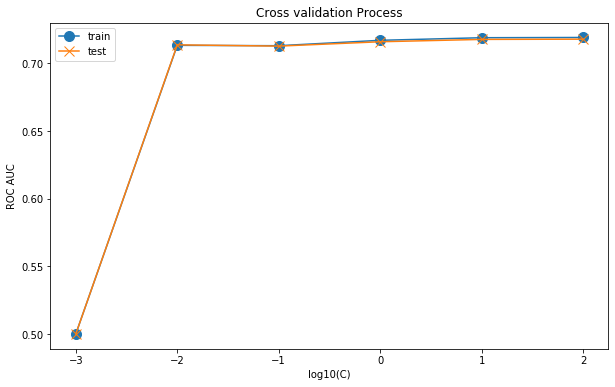

In [39]:
plt.figure(figsize=(10,6))
plt.plot(np.log10(C_vals),train, marker='o', markersize=10,label='train')
plt.plot(np.log10(C_vals),test, marker='x', markersize=10,label='test')

plt.title('Cross validation Process')
plt.xlabel('log10(C)')
plt.ylabel('ROC AUC')
plt.legend()

_____________________________________________________
**Up next, create interaction features for the case study data using scikit-learn's `PolynomialFeatures`. You should use 2 as the degree of polynomial features. Confirm that the number of new features makes sense.**

In [40]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
polynom=PolynomialFeatures(degree=2)

In [42]:
df_polynom=polynom.fit_transform(df[feature_list])

In [43]:
df_polynom

array([[1.0000000e+00, 2.0000000e+04, 2.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.2000000e+05, 2.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 4.0000000e+06],
       [1.0000000e+00, 9.0000000e+04, 2.0000000e+00, ..., 1.0000000e+06,
        5.0000000e+06, 2.5000000e+07],
       ...,
       [1.0000000e+00, 3.0000000e+04, 2.0000000e+00, ..., 4.0000000e+06,
        6.2000000e+06, 9.6100000e+06],
       [1.0000000e+00, 8.0000000e+04, 3.0000000e+00, ..., 2.8051853e+09,
        9.5547056e+07, 3.2544160e+06],
       [1.0000000e+00, 5.0000000e+04, 2.0000000e+00, ..., 1.0000000e+06,
        1.0000000e+06, 1.0000000e+06]])

_____________________________________________________
**Finally, repeat the cross-validation procedure and observe the model performance now.**

In [44]:
# Using the new features, make a 80:20 train/test split using a random seed of 24.**
X_train_polynom, X_test_polynom, y_train_polynom, y_test_polynom = train_test_split( df_polynom,y, test_size=0.20, random_state=24)

In [45]:
# Call the cross_val_C_search_pipe() function using the new training data.
# All other parameters should remain the same.
# Note that this training may take a few minutes due to the larger number of features.
train_polynom,test_polynom=cross_val_C_search_pipe(k_folds,C_vals,pipe,X_train_polynom,y_train_polynom)

Train: [ 5264  5265  5267 ... 21328 21329 21330] Validation: [   0    1    2 ... 5347 5348 5349]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Train: [    0     1     2 ... 21328 21329 21330] Validation: [ 5264  5265  5267 ... 10674 10678 10680]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Train: [    0     1     2 ... 21328 21329 21330] Validation: [10662 10663 10664 ... 16043 16068 16075]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Train: [    0     1     2 ... 16043 16068 16075] Validation: [15984 15987 15988 ... 21328 21329 21330]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Done with C{'memory': None, 'steps': [('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('model', LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False))], 'verbose': False, 'scaler': MinMaxScaler(copy=True, feature_range=(0, 1)), 'model': LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False), 'scaler__copy': True, 'scaler__feature_range': (0, 1), 'model__C': 100, 'model__class_weight': None, 'model__dual': False, 'model__fit_intercept': True, 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Train: [    0     1     2 ... 21328 21329 21330] Validation: [ 5264  5265  5267 ... 10674 10678 10680]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Train: [    0     1     2 ... 21328 21329 21330] Validation: [10662 10663 10664 ... 16043 16068 16075]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Train: [    0     1     2 ... 16043 16068 16075] Validation: [15984 15987 15988 ... 21328 21329 21330]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Done with C{'memory': None, 'steps': [('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('model', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False))], 'verbose': False, 'scaler': MinMaxScaler(copy=True, feature_range=(0, 1)), 'model': LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False), 'scaler__copy': True, 'scaler__feature_range': (0, 1), 'model__C': 10, 'model__class_weight': None, 'model__dual': False, 'model__fit_intercept': True, 'mo

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Train: [    0     1     2 ... 21328 21329 21330] Validation: [ 5264  5265  5267 ... 10674 10678 10680]
Train: [    0     1     2 ... 21328 21329 21330] Validation: [10662 10663 10664 ... 16043 16068 16075]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Train: [    0     1     2 ... 16043 16068 16075] Validation: [15984 15987 15988 ... 21328 21329 21330]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Done with C{'memory': None, 'steps': [('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('model', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False))], 'verbose': False, 'scaler': MinMaxScaler(copy=True, feature_range=(0, 1)), 'model': LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False), 'scaler__copy': True, 'scaler__feature_range': (0, 1), 'model__C': 1, 'model__class_weight': None, 'model__dual': False, 'model__fit_intercept': True, 'model

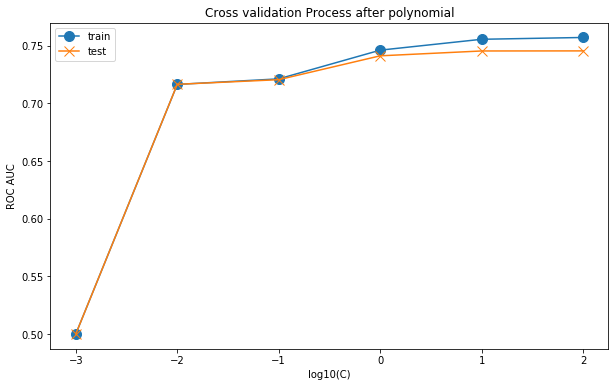

In [46]:
# Plot the average training and testing ROC AUC across folds, for each C value.
plt.figure(figsize=(10,6))
plt.plot(np.log10(C_vals),train_polynom, marker='o', markersize=10,label='train')
plt.plot(np.log10(C_vals),test_polynom, marker='x', markersize=10,label='test')

plt.title('Cross validation Process after polynomial')
plt.xlabel('log10(C)')
plt.ylabel('ROC AUC')
plt.legend()

**Take a look at the above graph. Does the average cross-validation testing performance improve with the interaction features? Is regularization useful?**